In [1]:
import simplejson as json
import requests # http lib
import pysftp # sftp lib
import base64 #... base64 lib
from pprint import pprint # garbage
from geolite2 import geolite2 # ip geolocation lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls

# plotting-related imports:
import folium

In [2]:
#create sftp connection to honeypot to grab logging data
with pysftp.Connection('13.58.190.48', username='ubuntu', private_key='blackbird_pub.pem') as sftp:
    sftp.get('/home/ubuntu/honeypot/results/kako.json')

In [3]:
#read raw data and saves to variable
raw_file = open('kako.json','r')
raw_captures = raw_file.readlines() # list of all json docs - as strings

In [4]:
all_captures = []
for cap in raw_captures:
    all_captures.append(json.loads(cap)) # converts str to json

In [5]:
locations = []
reader = geolite2.reader()
i=0
for cap in all_captures:
    src_ip = cap['source_ip']
    match = reader.get(src_ip)
    if match is not None:
        if match['location']['latitude'] is not None and match['location']['longitude'] is not None:
            #pprint(match)
            #print("\n\n\n\n\n\n\n")
            if 'city' in match and 'location' in match and 'country' in match:
               locations.append({
                                'lat': match['location']['latitude'], 
                                'lon': match['location']['longitude'],
                                'city': match['city']['names']['en'],
                                'country': match['country']['names']['en'],
                                'sim': cap['simulation_name'],
                                'dest_port': int(cap['destination_port']),
                                'iso_code': match['country']['iso_code']
                                } )
            


In [6]:
import time
for a in locations:
    print("city: " + a['city'])
    print("country: " + a['country'])
    print("sim: " + a['sim'])
    print("dest_port:",a['dest_port'])
#print('hi')
#for i,a in enumerate(locations):
#    print(a['dest_port'])

#print('hi2')

city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: St. Catharines
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: St. Catharines
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: St. Catharines
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim:

sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Sundsvall
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Sundsvall
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Sundsvall
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Sundsvall
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Sundsvall
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim


country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Ge

country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: North Bergen
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city:

city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
coun

dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Sim

sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Moscow
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
des

dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Balca
country: Turkey
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Istanbul
country: Turkey
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Jinan
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tucson
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Jinan
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Jinan
country: C

sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: 

country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 2

country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Surgut
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Surgut
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city

city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Nowshera
country: Pakistan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simul

city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux 

dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink

dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: T

dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: T

dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Vaxjo
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Vaxjo
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Vaxjo
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Vaxjo
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Vaxjo
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Vaxjo
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
count

sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tehran
country: Iran
sim: Linux Generic Telnet Simulation
dest_port: 23
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city

sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: T

country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: T

country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
countr

city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: 

city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Ho

dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Centr

dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: 

dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: São Lourenço
country: Brazil
sim: TPLink HTTP Simulation
dest_port: 80

Here begin mapping shenanigans

In [7]:
m=None
m = folium.Map(no_wrap=True)

tooltip = "Click for more info"
#print(len(all_captures))
#print(len(locations))
i=0
for loc in locations:
    folium.Marker([loc['lat'],loc['lon']],tooltip=tooltip, 
                  popup='{city}, {country}: {sim}, port {port}'.format(city=loc['city'],
                                                                    country=loc['country'],
                                                                    sim=loc['sim'],
                                                                   port=loc['dest_port'])).add_to(m)
    i+=1
    if (i==500):
        break

In [8]:
m

In [22]:
 for cap in all_captures:
    print(base64.b64decode(cap['capture']).strip().decode('ascii')) # decode from base64, strip trailing newline, decode into ascii
    print('#################################')

\xff\xfevstarcam2015
20150602
enable 
linuxshell
system 
shell 
sh 
/bin/busybox SEFA 
#################################
GET / HTTP/1.1
Host: 34.238.85.229
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8
Accept-Language: en-US,en;q=0.5
Accept-Encoding: gzip, deflate
Connection: keep-alive
Upgrade-Insecure-Requests: 1
#################################
GET / HTTP/1.1
Host: 34.238.85.229
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8
Accept-Language: en-US,en;q=0.5
Accept-Encoding: gzip, deflate
Connection: keep-alive
Upgrade-Insecure-Requests: 1
Authorization: Basic YmxhaDpibGFo
#################################
GET /favicon.ico HTTP/1.1
Host: 34.238.85.229
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0
Accept: text

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd9 in position 16: ordinal not in range(128)

In [10]:
 payload = all_captures[-1]['capture']
 api_url = "https://exploits.shodan.io/api/search"
 query_payload = {'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': 'MIRAI'}
 #print(query_payload)
 r = requests.get(api_url,params=query_payload)
 pprint(r.text)

'{"matches": [], "total": 0}'


In [99]:
df=pd.DataFrame(locations)
df2=pd.DataFrame(all_captures)['source_ip']
#df2 = pd.read_csv('ip.csv')
#print(df2[['source_ip']].groupby('source_ip'))
df[['iso_code','city']].groupby('iso_code').count().sort_values(by='city',ascending=False).to_csv('results.csv',sep=",")
#df2.groupby('source_ip').count().sort_values(by='source_ip',ascending=False).to_csv('ip.csv',sep=",")

            src_ip    0
0    43.229.38.171  321
1    192.186.23.25  259
2   121.201.45.173  259
3   132.232.193.63  253
4  193.112.182.252  208
5    193.112.1.116  192
6    120.27.233.64  164
7   103.71.236.215  129
8  104.214.221.238  107
9    2.249.160.194   91


<BarContainer object of 10 artists>

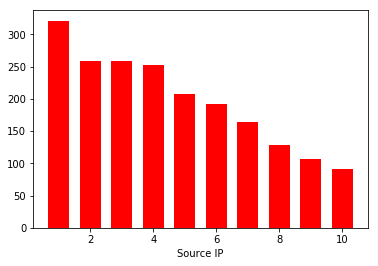

In [125]:
df2=pd.read_csv('ip.csv')
df3=df2.rename(index=str, columns={"183.192.241.114": "src_ip"}).groupby('src_ip').count().sort_values(by='0',ascending=False)
#df3=df3
df3.to_csv('pls.csv',sep=",")
df3=pd.read_csv('pls.csv')
#print(df3)
print(df3.head(10))
x=range(1,11)
#print(x)
y = df3['0'].head(10)
width = 1/1.5
N = len(y)
plt.xlabel('Source IP',rotation=0)
plt.bar(x,y,width,color="red")

<BarContainer object of 10 artists>

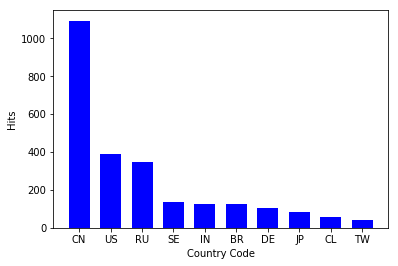

In [3]:
df2 = pd.read_csv('results.csv')
y = df2['city'].head(10)
x = df2['iso_code'].head(10)
width = 1/1.5
N = len(y)
plt.ylabel('Hits',rotation=90)
plt.xlabel('Country Code',rotation=0)
plt.bar(x,y,width,color="blue")
